In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [22]:
#f(X)=y
X = iris.data
y = iris.target

#data structure
print(type(X))
print(X[:5])

<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [3]:
feature_names = iris.feature_names
target_names = iris.target_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
#splitting the data into train and test sample
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [5]:
#Nearest Neighbours model
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train, y_train)
knc_pred = knc.predict(X_test)
print(knc_pred)

[2 0 2 1 1 2 0 2 0 0 2 1 1 2 1 0 2 2 1 0 2 1 0 1 1 1 1 1 2 1]


In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, knc_pred)

0.9666666666666667

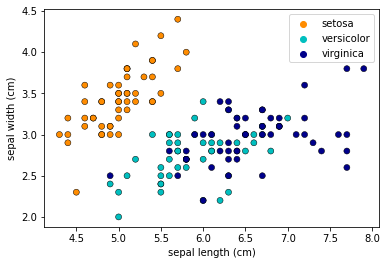

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# create color maps
cmap_bold = ['darkorange', 'c', 'darkblue']

#taking sepal features
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

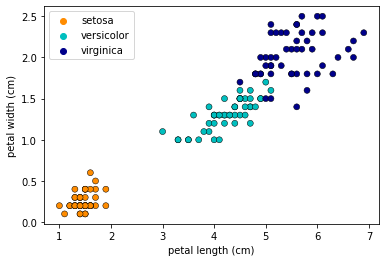

In [8]:
#taking petal features
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

In [9]:
#Decision Trees model
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = knc.predict(X_test)
print(dtc_pred)

[2 0 2 1 1 2 0 2 0 0 2 1 1 2 1 0 2 2 1 0 2 1 0 1 1 1 1 1 2 1]


In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dtc_pred)

0.9666666666666667

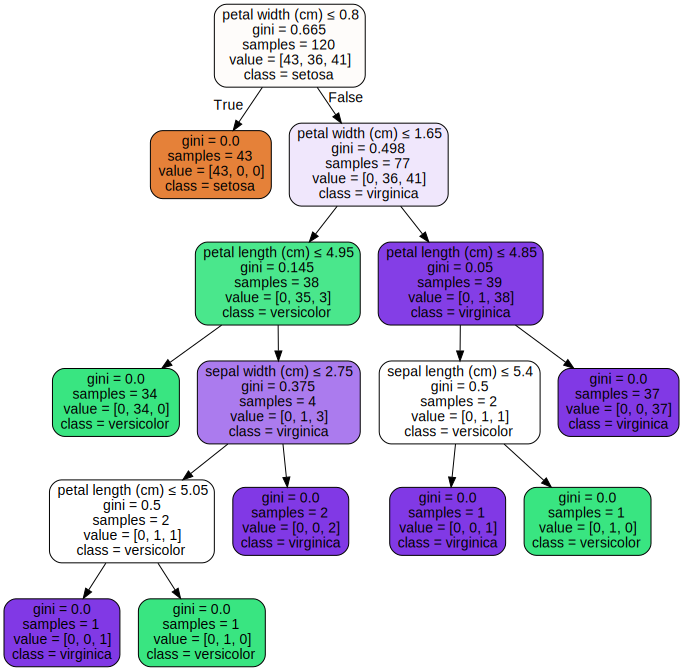

In [11]:
import graphviz
dot_data = export_graphviz(dtc, out_file=None, 
            feature_names=iris.feature_names,  
            class_names=iris.target_names,  
            filled=True, rounded=True,  
            special_characters=True)
graph = graphviz.Source(dot_data)  
graph

In [12]:
#test of new samples
samples = [[4,3,2,0.5],[6,2.5,4,1],[5,4,5,2]]
knc_predictions = knc.predict(samples)
dtc_predictions = dtc.predict(samples)
knc_prediction_names = [target_names[a] for a in knc_predictions]
dtc_prediction_names = [target_names[b] for b in dtc_predictions]
print('Nearest Neighbors predictions:', knc_prediction_names)
print('Decision trees predictions:', dtc_prediction_names)

Nearest Neighbors predictions: ['setosa', 'versicolor', 'virginica']
Decision trees predictions: ['setosa', 'versicolor', 'virginica']


In [13]:
#model persistence
import joblib
joblib.dump(knc, 'iris_model.joblib')

['iris_model.joblib']

In [14]:
model = joblib.load('iris_model.joblib')
model.predict(X_test)

array([2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 0, 2, 1,
       0, 1, 1, 1, 1, 1, 2, 1])